Data: https://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview

Sales for the thousands of product families sold at Favorita stores located in Ecuador.

In [6]:
## Imports
# General
import numpy as np
import pandas as pd

# from IPython.display import display, HTML
import df_html

# Plotting
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

__Company Research__

Company Site: https://www.corporacionfavorita.com/

Indicators: https://www.corporacionfavorita.com/indicadores/
* 24,690 total "collaborators"
    * 11,367 direct corporate
    * 7188 subsidiaries
    * 6135 international subsidiaries
* 14,205 total "providers"
    * 2615 Favorita Corporacion
    * 10,839 subsidiaries
    * 751 King Group
* 3,606,657 total clients
* 20,528 total shareholders
    * 14,197 individual shareholders
    * 3715 shareholder collaborators
    * 2616 retired collaborators
* 339,790 indirect jobs
    * 73,220 indirect jobs from Favoreita Corporacion (?)
    * 249,297 indirect jobs from subsidiaries
    * 17,273 indirect jobs from King Group

Formats and Subsidiaries: https://www.corporacionfavorita.com/marcas/
* Four main company sectors
    * Commercial
        * Retail (supermarkets, basic pharmacies, toys, construction, etc.), consumer discretionary
    * Real Estate
        Commercial, Service, Industrial
    * Industrial
        * Distribution, Industrial food production (bakeries, farms), clothing, office supplies, energy (Enermax)
    * Service
        * Telecommunications, e-commerce, insurance, financing, delivery


Favorita Corporacion is a large, multi-national conglomerate based in Ecuador. Majority of their companies seem to be more B2C, retail based.

# EDA

In [7]:
holidays_events = pd.read_csv('data/holidays_events.csv')
holidays_events['date'] = pd.to_datetime(holidays_events['date'])

oil = pd.read_csv('data/oil.csv')
oil['date'] = pd.to_datetime(oil['date'])

stores = pd.read_csv('data/stores.csv')

transactions = pd.read_csv('data/transactions.csv')
transactions['date'] = pd.to_datetime(transactions['date'])

train = pd.read_csv('data/train.csv')
train['date'] = pd.to_datetime(train['date'])
test = pd.read_csv('data/test.csv')
test['date'] = pd.to_datetime(test['date'])

In [9]:
dfs = [holidays_events.describe(include='all'),
    oil.describe(include='all'),
    stores.describe(include='all'),
    transactions.describe(include='all'),
    train.describe(include='all'),
    test.describe(include='all')]

titles = ["Holidays", "Oil", "Stores", "Transactions", "Train", "Test"]
df_html.display_dfs(dfs, titles, max_cols=5)

,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,NaN,6,3,24,103,2
top,NaN,Holiday,National,Ecuador,Carnaval,False
freq,NaN,221,174,174,10,338
mean,2015-04-24 00:45:15.428571392,NaN,NaN,NaN,NaN,NaN
min,2012-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN
25%,2013-12-23 06:00:00,NaN,NaN,NaN,NaN,NaN
50%,2015-06-08 00:00:00,NaN,NaN,NaN,NaN,NaN
75%,2016-07-03 00:00:00,NaN,NaN,NaN,NaN,NaN
max,2017-12-26 00:00:00,NaN,NaN,NaN,NaN,NaN


## holidays_events

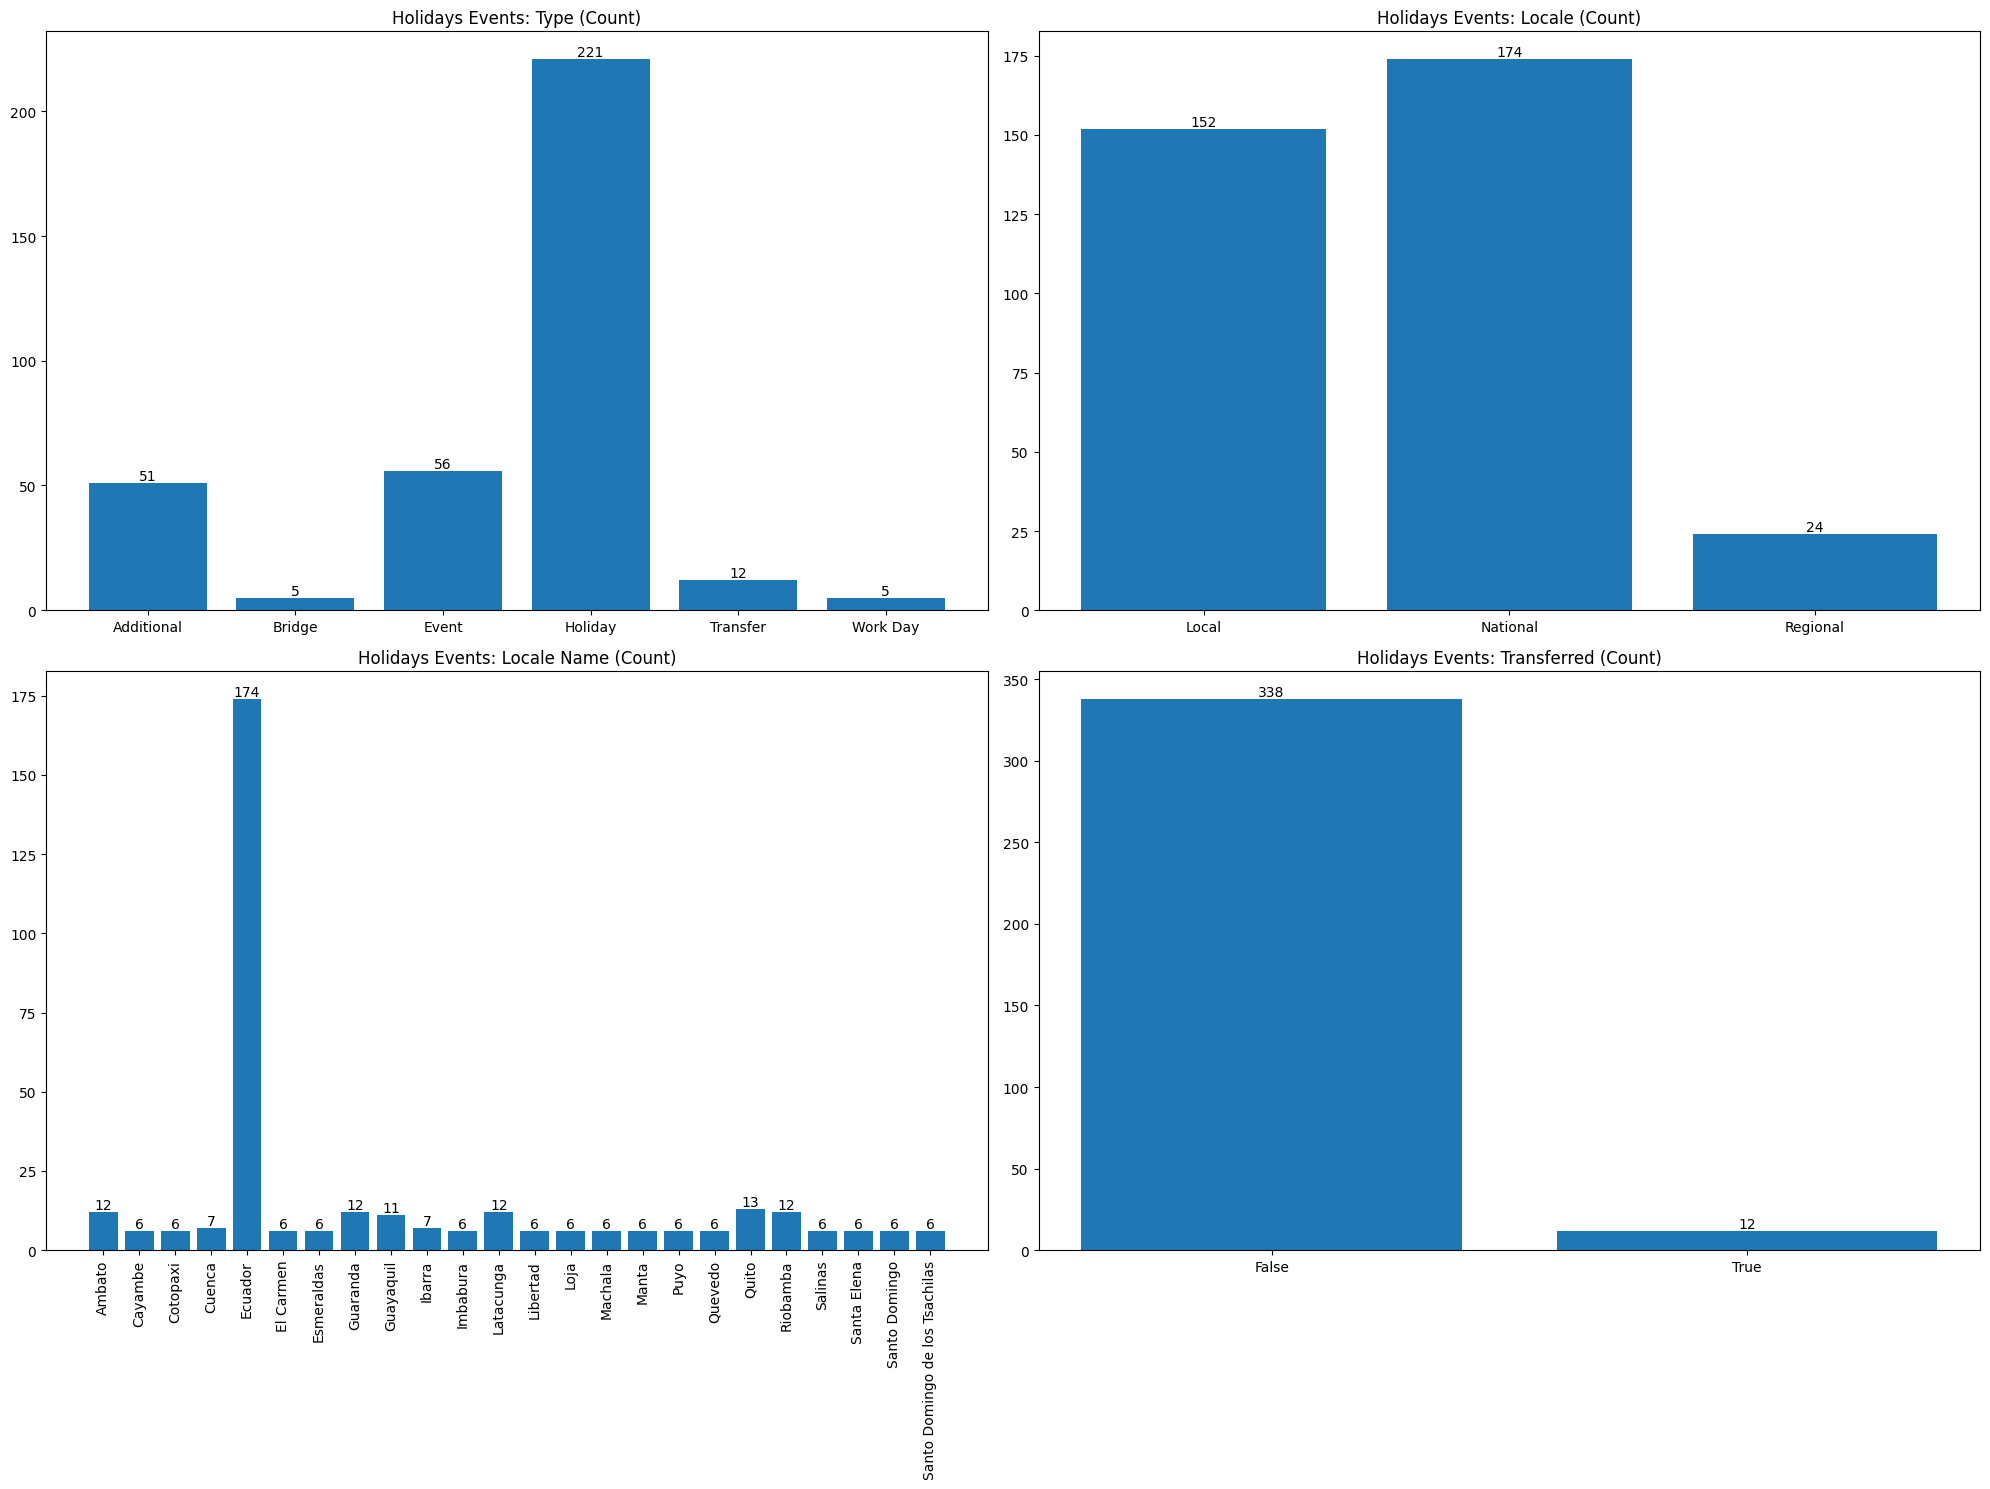

In [11]:
fig, axs = plt.subplots(2,2, figsize = (20,15))

holev_type = np.unique(holidays_events.type, return_counts=True)
holev_locale = np.unique(holidays_events.locale, return_counts=True)
holev_locale_name = np.unique(holidays_events.locale_name, return_counts=True)
holev_transferred = np.unique(holidays_events.transferred, return_counts=True)

axs[0,0].bar(*holev_type, align = 'center')
axs[0,1].bar(*holev_locale, align = 'center')
axs[1,0].bar(*holev_locale_name, align = 'center')
axs[1,1].bar(*holev_transferred, align = 'center')

axs[0,0].set_title('Holidays Events: Type (Count)')
axs[0,1].set_title('Holidays Events: Locale (Count)')
axs[1,0].set_title('Holidays Events: Locale Name (Count)')
axs[1,1].set_title('Holidays Events: Transferred (Count)')

axs[1,0].tick_params(axis = 'x', labelrotation = 90)
axs[1,1].set_xticks([0,1])
axs[1,1].set_xticklabels(['False', 'True'])

def bar_amounts(data, pos):
    for i, count in enumerate(data[1]):
        axs[*pos].text(i, count, str(count), ha = 'center', va = 'bottom')

bar_amounts(holev_type, [0,0])
bar_amounts(holev_locale, [0,1])
bar_amounts(holev_locale_name, [1,0])
bar_amounts(holev_transferred, [1,1])

fig.tight_layout()
plt.show()

## oil

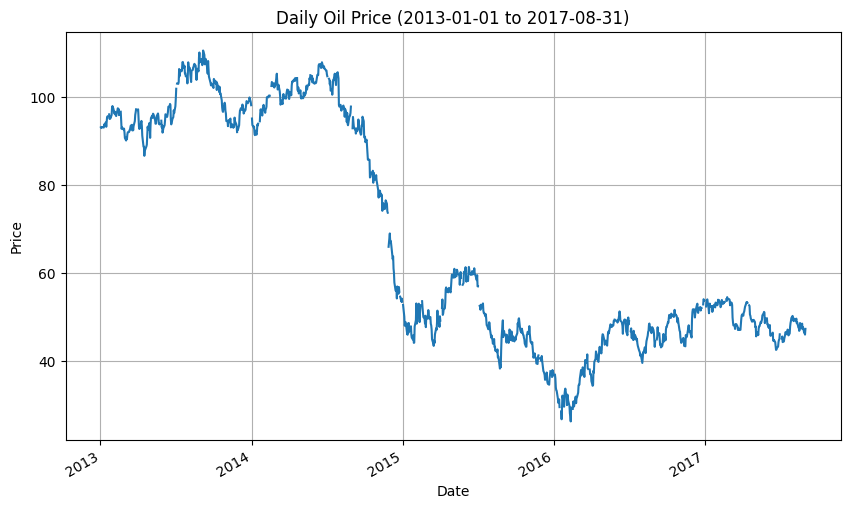

In [18]:
plt.figure(figsize=(10,6))
plt.plot(oil.date, oil.dcoilwtico)
plt.title('Daily Oil Price (2013-01-01 to 2017-08-31)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.show()

## stores

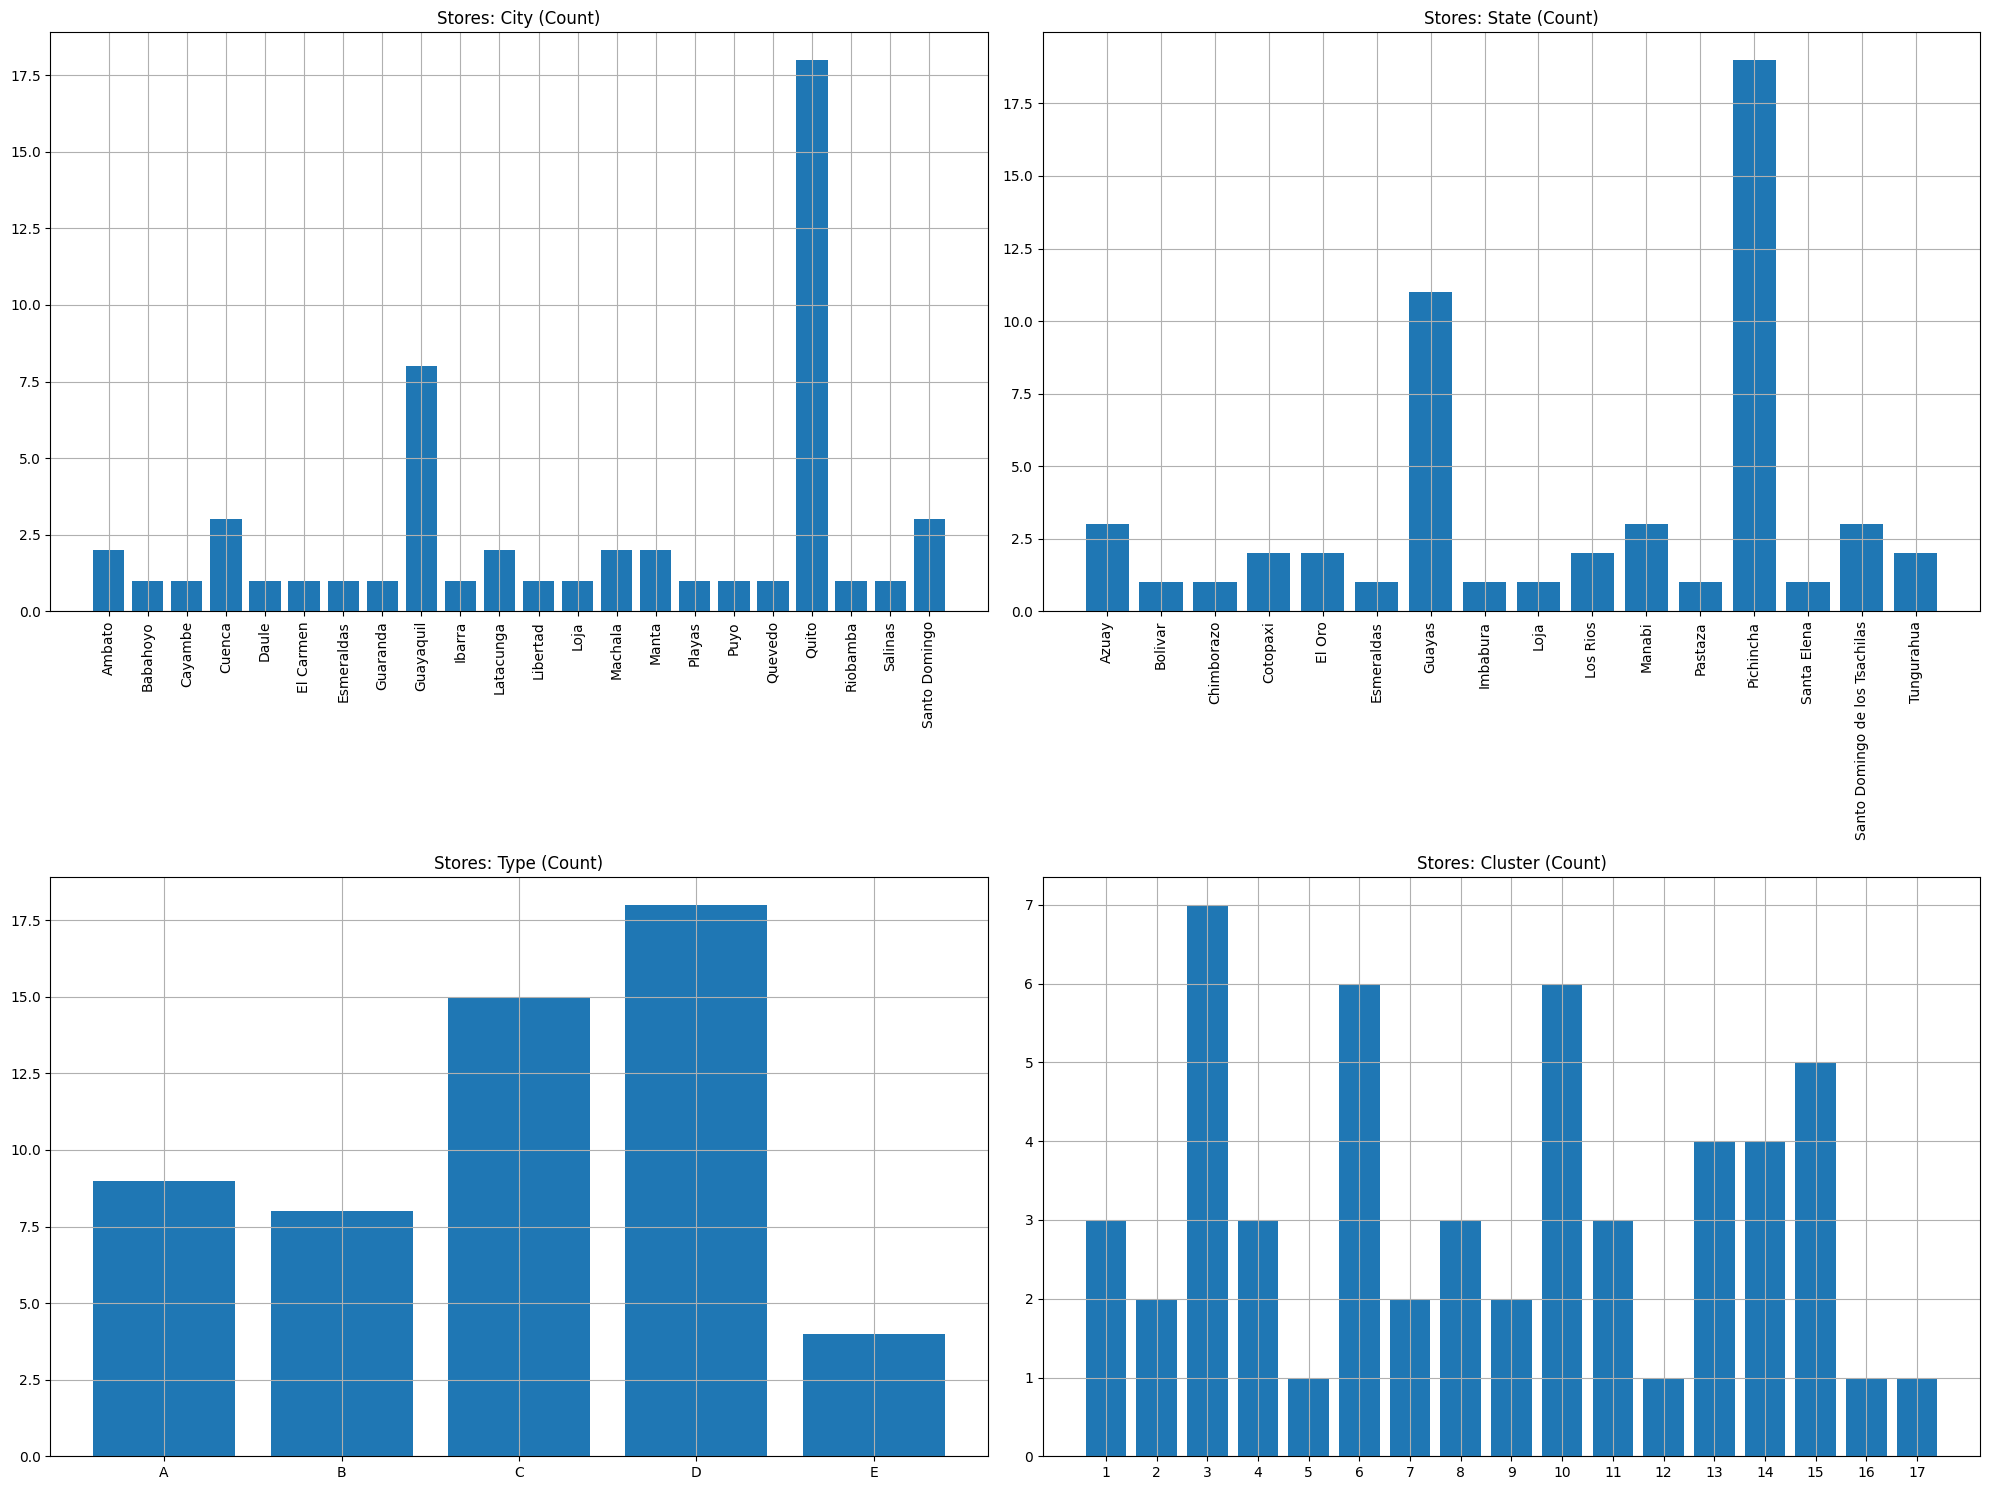

In [19]:
fig, axs = plt.subplots(2,2, figsize = (20,15))

stores_city = np.unique(stores.city, return_counts=True)
stores_state = np.unique(stores.state, return_counts=True)
stores_type = np.unique(stores.type, return_counts=True)
stores_cluster = np.unique(stores.cluster, return_counts=True)

axs[0,0].bar(*stores_city, align = 'center')
axs[0,1].bar(*stores_state, align = 'center')
axs[1,0].bar(*stores_type, align = 'center')
axs[1,1].bar(*stores_cluster, align= 'center')

axs[0,0].set_title('Stores: City (Count)')
axs[0,1].set_title('Stores: State (Count)')
axs[1,0].set_title('Stores: Type (Count)')
axs[1,1].set_title('Stores: Cluster (Count)')

axs[0,0].tick_params(axis = 'x', labelrotation = 90)
axs[0,1].tick_params(axis = 'x', labelrotation = 90)
axs[1,1].set_xticks(np.unique(stores.cluster))

def bar_amounts(data, pos):
    for i, count in enumerate(data[1]):
        axs[*pos].text(i, count, str(count), ha = 'center', va = 'bottom')

# bar_amounts(stores_city, [0,0])
# bar_amounts(stores_state, [0,1])
# bar_amounts(stores_type, [1,0])
# bar_amounts(stores_cluster, [1,1])

fig.tight_layout()
axs[0,0].grid(True)
axs[0,1].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)

plt.show()

## transactions

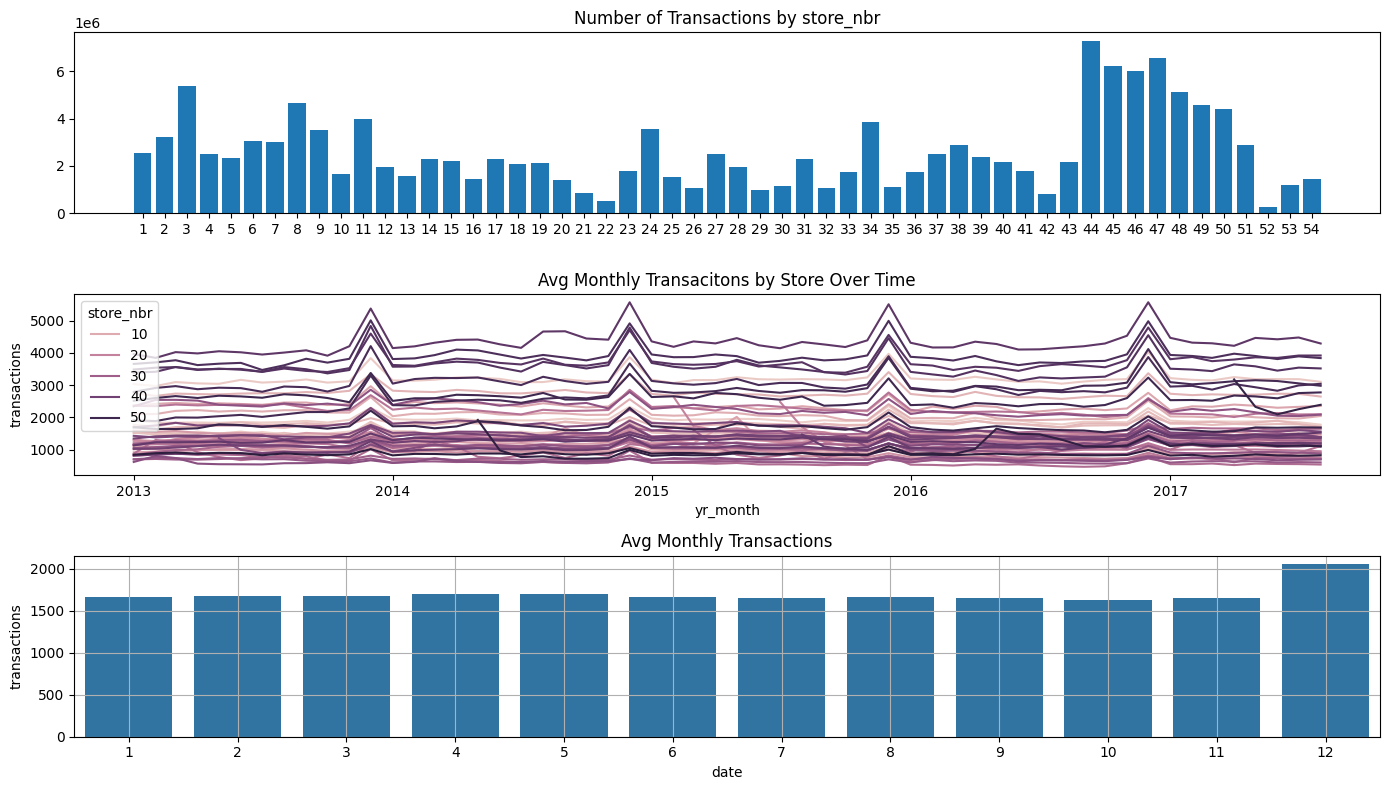

In [33]:
transactions_by_storeNbr = transactions.groupby('store_nbr')['transactions'].sum().sort_values(ascending=True)

transactions_monthly = transactions.copy()
transactions_monthly['yr_month'] = transactions_monthly['date'].dt.to_period('M')
transactions_monthly_avg = transactions_monthly.groupby(['yr_month', 'store_nbr'])['transactions'].mean().reset_index()
transactions_monthly_avg['yr_month'] = transactions_monthly_avg['yr_month'].dt.to_timestamp()

transactions_month_only = transactions.groupby(transactions_monthly.date.dt.month)['transactions'].mean().reset_index()

fig, axs = plt.subplots(3, 1, figsize=(14,8))

# transactions_by_storeNbr.plot(kind='barh', ax=axs[0])
axs[0].bar(x=transactions_by_storeNbr.index,
           height=transactions_by_storeNbr.values,
           tick_label=transactions_by_storeNbr.index,
           width=0.8)
axs[0].set_title('Number of Transactions by store_nbr')

sns.lineplot(data=transactions_monthly_avg,
             x='yr_month',
             y='transactions',
             hue='store_nbr',
             ax=axs[1]
             )

axs[1].set_title('Avg Monthly Transacitons by Store Over Time')

sns.barplot(data=transactions_month_only,
            x='date',
            y='transactions',
            ax=axs[2]
            )

axs[2].set_title('Avg Monthly Transactions')
axs[2].grid(True)

# axs[0].set_title('Transactions by store_nbr')
# plt.subplots_adjust(left=0.05, right=0.95)
plt.tight_layout()

## train

In [ ]:
train_monthly = train.copy()
train_monthly['yr_month'] = train_monthly['date'].dt.to_period('M')

train_monthly_avgSales = train_monthly.groupby(['yr_month', 'store_nbr', 'family'])[['sales']].mean().reset_index()
train_monthly_avgSales['yr_month'] = train_monthly_avgSales['yr_month'].dt.to_timestamp()
train_monthly_avgOnpromotion = train_monthly.groupby(['yr_month', 'store_nbr', 'family'])[['onpromotion']].mean().reset_index()
train_monthly_avgOnpromotion['yr_month'] = train_monthly_avgOnpromotion['yr_month'].dt.to_timestamp()

### General Sales Over Time

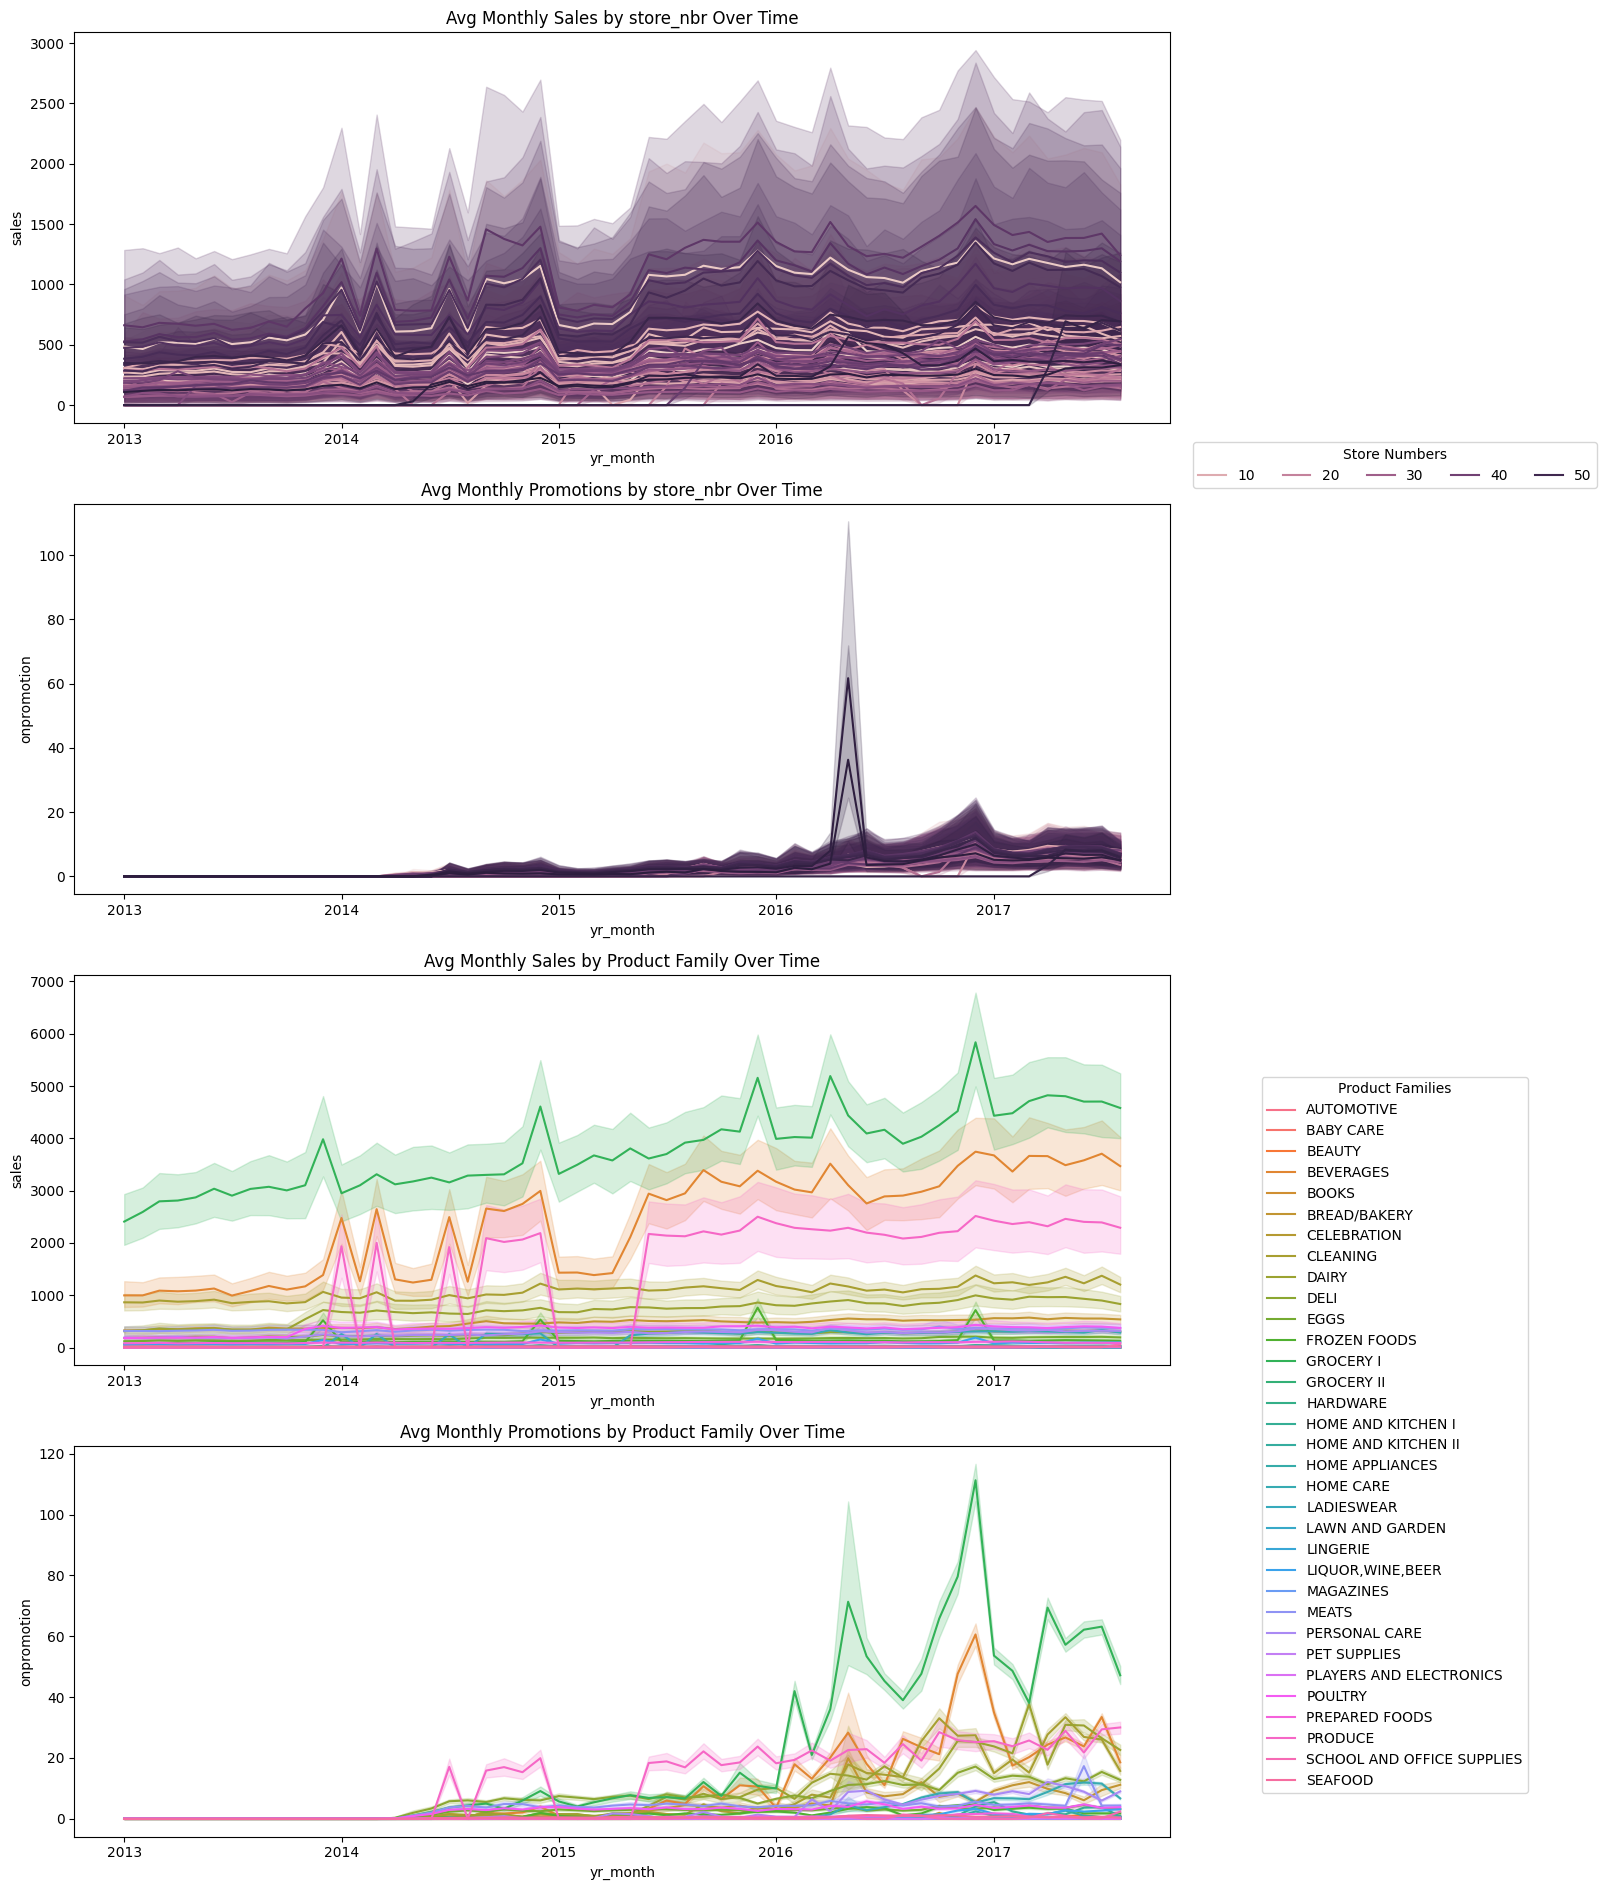

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(14,20))
plt.rcParams['agg.path.chunksize'] = 50000

# First subplot (store_nbr sales)
sns.lineplot(data=train_monthly_avgSales,
             x='yr_month',
             y='sales',
             hue='store_nbr',
             ax=axs[0])

# Create temporary legend to generate handles, then remove it
temp_legend1 = axs[0].legend(title="Store Numbers")
temp_legend1.remove()
handles1, labels1 = axs[0].get_legend_handles_labels()
axs[0].set_title('Avg Monthly Sales by store_nbr Over Time')

# Second subplot (store_nbr promotions)
sns.lineplot(data=train_monthly_avgOnpromotion,
             x='yr_month',
             y='onpromotion',
             hue='store_nbr',
             ax=axs[1])
             
# We already have store_nbr handles from first plot
axs[1].get_legend().remove()
axs[1].set_title('Avg Monthly Promotions by store_nbr Over Time')

# Third subplot (family sales)
sns.lineplot(data=train_monthly_avgSales,
             x='yr_month',
             y='sales',
             hue='family',
             ax=axs[2])
             
# Create temporary legend to generate handles, then remove it
temp_legend3 = axs[2].legend(title="Product Families")
temp_legend3.remove()
handles3, labels3 = axs[2].get_legend_handles_labels()
axs[2].set_title('Avg Monthly Sales by Product Family Over Time')

# Fourth subplot (family promotions)
sns.lineplot(data=train_monthly_avgOnpromotion,
             x='yr_month',
             y='onpromotion',
             hue='family',
             ax=axs[3])
             
# We already have family handles from third plot
axs[3].get_legend().remove()
axs[3].set_title('Avg Monthly Promotions by Product Family Over Time')

# Create collective legends
fig.legend(handles1, labels1, loc='lower center', ncol=6, title='Store Numbers', 
           bbox_to_anchor=(1, 0.75))

fig.legend(handles3, labels3, loc='center right', ncol=1, title='Product Families',
           bbox_to_anchor=(1.1, 0.28))

# Adjust layout to make room for legends
plt.tight_layout(rect=(0, 0.05, 0.85, 1))

### Zero Sales

In [16]:
no_sales = train[train.sales == 0]
no_sales['year'] = no_sales['date'].dt.year
no_sales['month_year'] = no_sales['date'].dt.to_period('M')

df_html.display_dfs([no_sales.groupby(['family']).count().sort_values('sales', ascending=False).head(10),
                     no_sales.groupby(['store_nbr']).count().sort_values('sales', ascending=False).head(10)],
                     titles=['Zero Sales by family', 'Zero Sales by store_nbr'],
                     max_cols=3)

C:\Users\yangt\AppData\Local\Temp\ipykernel_5020\2831343911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_sales['year'] = no_sales['date'].dt.year
C:\Users\yangt\AppData\Local\Temp\ipykernel_5020\2831343911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_sales['month_year'] = no_sales['date'].dt.to_period('M')


,id,date,store_nbr,sales,onpromotion,year,month_year
family,,,,,,,
BOOKS,88167,88167,88167,88167,88167,88167,88167
BABY CARE,85599,85599,85599,85599,85599,85599,85599
SCHOOL AND OFFICE SUPPLIES,67368,67368,67368,67368,67368,67368,67368
HOME APPLIANCES,66854,66854,66854,66854,66854,66854,66854
LADIESWEAR,54422,54422,54422,54422,54422,54422,54422
MAGAZINES,51414,51414,51414,51414,51414,51414,51414
PET SUPPLIES,49665,49665,49665,49665,49665,49665,49665
HARDWARE,43524,43524,43524,43524,43524,43524,43524
LAWN AND GARDEN,42544,42544,42544,42544,42544,42544,42544


### Date Analysis

In [17]:
train.groupby(['store_nbr']).sum()

TypeError: datetime64 type does not support sum operations

## Noise and Seasonality

In [ ]:
# https://www.kaggle.com/code/odins0n/exploring-time-series-plots-beginners-guide#%F0%9F%93%88EXPLORING-TIME-SERIES-PLOTS:-BEGINNERS-GUIDE%F0%9F%93%88-
def white_noise(time, noise_level = 1 , seed = None):
    random = np.random.RandomState(seed)
    return random.random(len(time)) * noise_level

